In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xarray as xr
import geopandas as gpd

## Climate data download

I have data on all states in India. The data can be found on the website copernicus.eu

The data correspond to : the soil temperature (level 1) : stl1, the volumetric soil water (layer 1) : swvl1, the surface net solar radiation : ssr, the evaporation from bare soil : evabs, the total precipitation and leaf area indices (high and low vegetation) : lai_hv and lai_lv.

I test first on Andhra Pradesh.

In [29]:
ds_Andhra_Pradesh = xr.open_dataset('../../Data/ClimateData/Andhra_Pradesh.nc')
df_Andhra_Pradesh = ds_Andhra_Pradesh.to_dataframe()
df_Andhra_Pradesh.reset_index(inplace=True)
df_Andhra_Pradesh = df_Andhra_Pradesh.drop(columns = ['time','longitude', 'latitude'])
#df_Andhra_Pradesh
cols = df_Andhra_Pradesh.columns.to_numpy()
print(cols)
mean_arr = df_Andhra_Pradesh.mean().to_numpy().reshape(1,7)
print(mean_arr)

['evabs' 'lai_hv' 'lai_lv' 'stl1' 'ssr' 'tp' 'swvl1']
[[-1.4186681e-03  1.2531391e+00  1.4060900e+00  3.0214771e+02
   1.5518060e+07  2.2026268e-03  2.4879448e-01]]


In [30]:
#mean_df = pd.DataFrame(mean_arr, columns = cols)
#mean_df

Now I work on all the states

In [31]:
states_names = ['Andhra_Pradesh', 'Bihar', 'Chhattisgarh', 'Gujarat', 'Haryana', 'Jharkhand', 'Karnataka', 'Madhya', 'Maharashtra', 'Odisha', 'Rajasthan', 'Tamil_Nadu', 'Telangana','Uttar_Pradesh', 'Uttarakhand', 'West_Bengal']

for state in states_names :
    if state != 'Andhra_Pradesh' :
        ds_state = xr.open_dataset(f'../../Data/ClimateData/{state}.nc')
        df_state = ds_state.to_dataframe()
        df_state.reset_index(inplace=True)
        df_state = df_state.drop(columns = ['time','longitude', 'latitude'])

        mean_arr = np.concatenate((mean_arr, df_state.mean().to_numpy().reshape(1,7)), axis=0)

mean_df = pd.DataFrame(mean_arr, columns = cols)
mean_df

,evabs,lai_hv,lai_lv,stl1,ssr,tp,swvl1
0,-0.001419,1.253139,1.406090,302.147705,15518060.0,0.002203,0.248794
1,-0.001655,0.840681,1.462966,299.819580,14511972.0,0.003445,0.250221
2,-0.001533,2.058173,2.143503,299.476166,15085622.0,0.003987,0.251370
3,-0.000821,1.273033,1.304514,302.339966,15685694.0,0.001621,0.182341
4,-0.000980,0.029176,1.110729,300.126190,14900950.0,0.001492,0.162914
5,-0.001668,1.967572,2.050625,299.015442,14748817.0,0.003530,0.252371
6,-0.001335,1.848203,1.625398,300.045624,15659798.0,0.003365,0.297114
7,-0.001456,1.796592,1.862362,300.062195,15412315.0,0.002993,0.279778
8,-0.001219,1.587225,1.741591,301.311310,15952608.0,0.002694,0.268606
9,-0.001652,2.117540,2.340446,300.166992,14875499.0,0.004047,0.252900


In [32]:
mean_df.insert(0,'state',states_names)

We obtain our dataframe. We are going to outline clusters between states based on this dataframe.

In [33]:
mean_df

,state,evabs,lai_hv,lai_lv,stl1,ssr,tp,swvl1
0,Andhra_Pradesh,-0.001419,1.253139,1.406090,302.147705,15518060.0,0.002203,0.248794
1,Bihar,-0.001655,0.840681,1.462966,299.819580,14511972.0,0.003445,0.250221
2,Chhattisgarh,-0.001533,2.058173,2.143503,299.476166,15085622.0,0.003987,0.251370
3,Gujarat,-0.000821,1.273033,1.304514,302.339966,15685694.0,0.001621,0.182341
4,Haryana,-0.000980,0.029176,1.110729,300.126190,14900950.0,0.001492,0.162914
5,Jharkhand,-0.001668,1.967572,2.050625,299.015442,14748817.0,0.003530,0.252371
6,Karnataka,-0.001335,1.848203,1.625398,300.045624,15659798.0,0.003365,0.297114
7,Madhya,-0.001456,1.796592,1.862362,300.062195,15412315.0,0.002993,0.279778
8,Maharashtra,-0.001219,1.587225,1.741591,301.311310,15952608.0,0.002694,0.268606
9,Odisha,-0.001652,2.117540,2.340446,300.166992,14875499.0,0.004047,0.252900


## K-means clustering

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import PowerTransformer
full_data=mean_df.drop(columns = ['state'])
full_data

,evabs,lai_hv,lai_lv,stl1,ssr,tp,swvl1
0,-0.001419,1.253139,1.406090,302.147705,15518060.0,0.002203,0.248794
1,-0.001655,0.840681,1.462966,299.819580,14511972.0,0.003445,0.250221
2,-0.001533,2.058173,2.143503,299.476166,15085622.0,0.003987,0.251370
3,-0.000821,1.273033,1.304514,302.339966,15685694.0,0.001621,0.182341
4,-0.000980,0.029176,1.110729,300.126190,14900950.0,0.001492,0.162914
5,-0.001668,1.967572,2.050625,299.015442,14748817.0,0.003530,0.252371
6,-0.001335,1.848203,1.625398,300.045624,15659798.0,0.003365,0.297114
7,-0.001456,1.796592,1.862362,300.062195,15412315.0,0.002993,0.279778
8,-0.001219,1.587225,1.741591,301.311310,15952608.0,0.002694,0.268606
9,-0.001652,2.117540,2.340446,300.166992,14875499.0,0.004047,0.252900


In [35]:
for c in full_data.columns:
    pt = PowerTransformer()
    full_data.loc[:, c] = pt.fit_transform(np.array(full_data[c]).reshape(-1, 1))

full_data

/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: overflow encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: overflow encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,evabs,lai_hv,lai_lv,stl1,ssr,tp,swvl1
0,0.117108,-0.546961,-0.723774,0.788341,0.0,-0.814169,-0.087036
1,-0.980164,-1.130480,-0.586933,-0.054332,0.0,0.554041,-0.052769
2,-0.357399,1.048903,1.276105,-0.174636,0.0,1.291451,-0.024862
3,1.508751,-0.514938,-0.960857,0.860084,0.0,-1.326372,-1.294172
4,1.266209,-1.859061,-1.387078,0.053933,0.0,-1.430485,-1.532348
5,-1.054598,0.837781,0.997453,-0.334455,0.0,0.663187,-0.000311
6,0.410700,0.572081,-0.180021,0.025406,0.0,0.452914,1.335696
7,-0.026061,0.461551,0.456189,0.031269,0.0,0.008308,0.758408
8,0.748591,0.039743,0.125642,0.480099,0.0,-0.321234,0.427982
9,-0.965344,1.191709,1.892267,0.068401,0.0,1.379177,0.012735


<function matplotlib.pyplot.show(*args, **kw)>

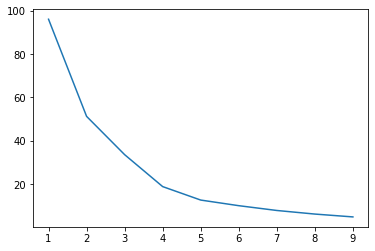

In [36]:
losses = []
X = [1,2,3,4,5,6,7,8,9]
for i in range(1,10) :
    kmeans = KMeans(n_clusters=i).fit(full_data)
    kmeans_loss = kmeans.inertia_
    losses.append(kmeans_loss)
plt.plot(X,losses)
plt.show

In [37]:
kmeans = KMeans(n_clusters=4).fit(full_data)
kmeans_labels = kmeans.labels_
print(kmeans_labels)

[3 3 0 1 1 0 3 3 3 0 1 3 3 3 2 0]


In [38]:
mean_df.insert(1,'cluster',kmeans_labels)
mean_df

,state,cluster,evabs,lai_hv,lai_lv,stl1,ssr,tp,swvl1
0,Andhra_Pradesh,3,-0.001419,1.253139,1.406090,302.147705,15518060.0,0.002203,0.248794
1,Bihar,3,-0.001655,0.840681,1.462966,299.819580,14511972.0,0.003445,0.250221
2,Chhattisgarh,0,-0.001533,2.058173,2.143503,299.476166,15085622.0,0.003987,0.251370
3,Gujarat,1,-0.000821,1.273033,1.304514,302.339966,15685694.0,0.001621,0.182341
4,Haryana,1,-0.000980,0.029176,1.110729,300.126190,14900950.0,0.001492,0.162914
5,Jharkhand,0,-0.001668,1.967572,2.050625,299.015442,14748817.0,0.003530,0.252371
6,Karnataka,3,-0.001335,1.848203,1.625398,300.045624,15659798.0,0.003365,0.297114
7,Madhya,3,-0.001456,1.796592,1.862362,300.062195,15412315.0,0.002993,0.279778
8,Maharashtra,3,-0.001219,1.587225,1.741591,301.311310,15952608.0,0.002694,0.268606
9,Odisha,0,-0.001652,2.117540,2.340446,300.166992,14875499.0,0.004047,0.252900


In [40]:
plot_data=mean_df.drop(columns = ['evabs', 'lai_hv', 'lai_lv', 'stl1', 'ssr', 'tp', 'swvl1'])
plot_data['state'] = plot_data['state'].replace(to_replace='Andhra_Pradesh', value='Andhra Pradesh')
plot_data['state'] = plot_data['state'].replace(to_replace='Madhya', value='Madhya Pradesh')
plot_data['state'] = plot_data['state'].replace(to_replace='Tamil_Nadu', value='Tamil Nadu')
plot_data['state'] = plot_data['state'].replace(to_replace='Uttar_Pradesh', value='Uttar Pradesh')
plot_data['state'] = plot_data['state'].replace(to_replace='West_Bengal', value='West Bengal')
plot_data

,state,cluster
0,Andhra Pradesh,3
1,Bihar,3
2,Chhattisgarh,0
3,Gujarat,1
4,Haryana,1
5,Jharkhand,0
6,Karnataka,3
7,Madhya Pradesh,3
8,Maharashtra,3
9,Odisha,0


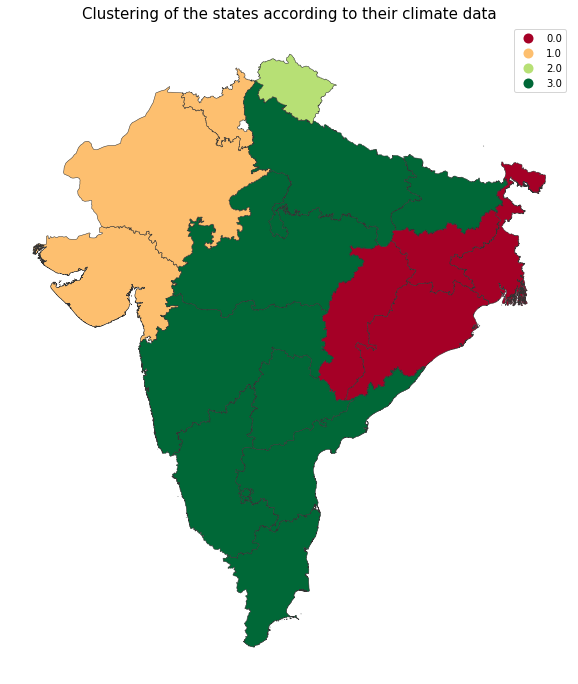

In [41]:
map_path = '../../maps/gadm36_IND_shp/gadm36_IND_1.shp'
map_gdf = gpd.read_file(map_path)
merged = map_gdf.set_index('NAME_1').join(plot_data.set_index('state'))

fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Clustering of the states according to their climate data',
            fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='cluster', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2', categorical=True, legend=True)

## Clustering according to the seasons

We split the dataset in two according to the season of the measures.

In [68]:
ds_Andhra_Pradesh = xr.open_dataset('../../Data/ClimateData/Andhra_Pradesh.nc')
df_Andhra_Pradesh = ds_Andhra_Pradesh.to_dataframe()
df_Andhra_Pradesh.reset_index(inplace=True)
df_Andhra_Pradesh = df_Andhra_Pradesh.drop(columns = ['longitude', 'latitude'])

time_arr = df_Andhra_Pradesh['time'].to_numpy()
#time_arr
months = time_arr.astype('datetime64[M]').astype(int) % 12 + 1
#months
months_df = pd.DataFrame(months, columns=['month']) 

kharif_months = [6,7,8,9,10]
rabi_months = [1,2,3,4,5,11,12]
df_Andhra_Pradesh['month'] = months_df['month']
df_AP_rabi = df_Andhra_Pradesh[df_Andhra_Pradesh['month'].isin(rabi_months)]
df_AP_kharif = df_Andhra_Pradesh[df_Andhra_Pradesh['month'].isin(kharif_months)]
df_AP_rabi = df_AP_rabi.drop(columns = ['time', 'month'])
df_AP_kharif = df_AP_kharif.drop(columns = ['time', 'month'])

cols = df_AP_rabi.columns.to_numpy()
#print(cols)

mean_rabi_arr = df_AP_rabi.mean().to_numpy().reshape(1,7)
mean_kharif_arr = df_AP_kharif.mean().to_numpy().reshape(1,7)
#print(mean_rabi_arr)
#print(mean_kharif_arr)

states_names = ['Andhra_Pradesh', 'Bihar', 'Chhattisgarh', 'Gujarat', 'Haryana', 'Jharkhand', 'Karnataka', 'Madhya', 'Maharashtra', 'Odisha', 'Rajasthan', 'Tamil_Nadu', 'Telangana','Uttar_Pradesh', 'Uttarakhand', 'West_Bengal']

for state in states_names :
    if state != 'Andhra_Pradesh' :
        ds_state = xr.open_dataset(f'../../Data/ClimateData/{state}.nc')
        df_state = ds_state.to_dataframe()
        df_state.reset_index(inplace=True)
        df_state = df_state.drop(columns = ['longitude', 'latitude'])

        time_arr = df_state['time'].to_numpy()
        months = time_arr.astype('datetime64[M]').astype(int) % 12 + 1
        months_df = pd.DataFrame(months, columns=['month']) 

        df_state['month'] = months_df['month']
        df_state_rabi = df_state[df_state['month'].isin(rabi_months)]
        df_state_kharif = df_state[df_state['month'].isin(kharif_months)]
        df_state_rabi = df_state_rabi.drop(columns = ['time', 'month'])
        df_state_kharif = df_state_kharif.drop(columns = ['time', 'month'])

        mean_rabi_arr = np.concatenate((mean_rabi_arr,df_state_rabi.mean().to_numpy().reshape(1,7)), axis=0)
        mean_kharif_arr = np.concatenate((mean_kharif_arr,df_state_kharif.mean().to_numpy().reshape(1,7)), axis=0)

mean_rabi_df = pd.DataFrame(mean_rabi_arr, columns = cols)
mean_kharif_df = pd.DataFrame(mean_kharif_arr, columns = cols)

mean_rabi_df.insert(0,'state',states_names)
mean_kharif_df.insert(0,'state',states_names)

#print(mean_rabi_df)
#print(mean_kharif_df)

### Rabi clustering

/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: overflow encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: overflow encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


<function matplotlib.pyplot.show(*args, **kw)>

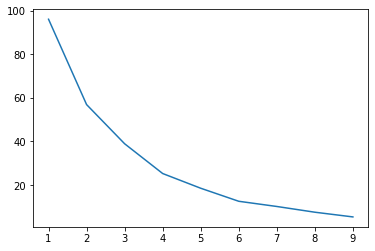

In [69]:
full_data=mean_rabi_df.drop(columns = ['state'])

for c in full_data.columns:
    pt = PowerTransformer()
    full_data.loc[:, c] = pt.fit_transform(np.array(full_data[c]).reshape(-1, 1))

losses = []
X = [1,2,3,4,5,6,7,8,9]
for i in range(1,10) :
    kmeans = KMeans(n_clusters=i).fit(full_data)
    kmeans_loss = kmeans.inertia_
    losses.append(kmeans_loss)
plt.plot(X,losses)
plt.show

In [70]:
kmeans = KMeans(n_clusters=4).fit(full_data)
kmeans_labels = kmeans.labels_
mean_rabi_df.insert(1,'cluster',kmeans_labels)
plot_data=mean_rabi_df.drop(columns = ['evabs', 'lai_hv', 'lai_lv', 'stl1', 'ssr', 'tp', 'swvl1'])
plot_data['state'] = plot_data['state'].replace(to_replace='Andhra_Pradesh', value='Andhra Pradesh')
plot_data['state'] = plot_data['state'].replace(to_replace='Madhya', value='Madhya Pradesh')
plot_data['state'] = plot_data['state'].replace(to_replace='Tamil_Nadu', value='Tamil Nadu')
plot_data['state'] = plot_data['state'].replace(to_replace='Uttar_Pradesh', value='Uttar Pradesh')
plot_data['state'] = plot_data['state'].replace(to_replace='West_Bengal', value='West Bengal')
plot_data

,state,cluster
0,Andhra Pradesh,0
1,Bihar,0
2,Chhattisgarh,2
3,Gujarat,1
4,Haryana,1
5,Jharkhand,2
6,Karnataka,0
7,Madhya Pradesh,0
8,Maharashtra,0
9,Odisha,2


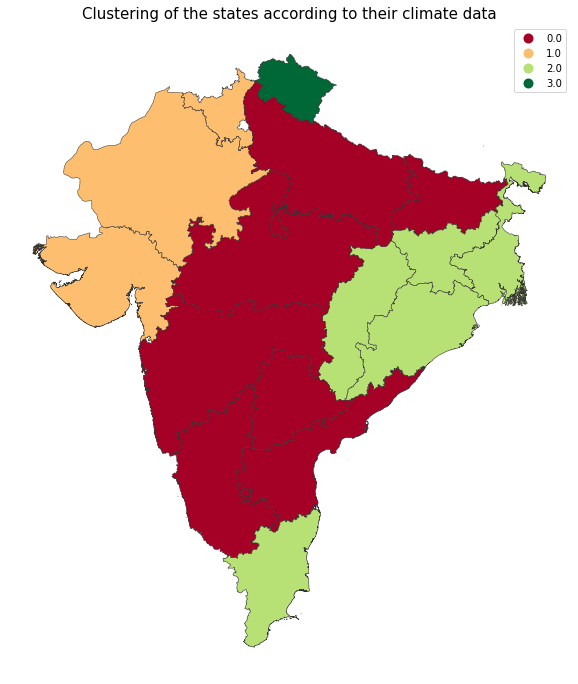

In [71]:
map_path = '../../maps/gadm36_IND_shp/gadm36_IND_1.shp'
map_gdf = gpd.read_file(map_path)
merged = map_gdf.set_index('NAME_1').join(plot_data.set_index('state'))

fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Clustering of the states according to their climate data',
            fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='cluster', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2', categorical=True, legend=True)

### Kharif clustering

/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: overflow encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2995: RuntimeWarning: overflow encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


<function matplotlib.pyplot.show(*args, **kw)>

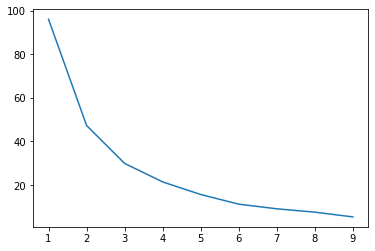

In [72]:
full_data=mean_kharif_df.drop(columns = ['state'])

for c in full_data.columns:
    pt = PowerTransformer()
    full_data.loc[:, c] = pt.fit_transform(np.array(full_data[c]).reshape(-1, 1))

losses = []
X = [1,2,3,4,5,6,7,8,9]
for i in range(1,10) :
    kmeans = KMeans(n_clusters=i).fit(full_data)
    kmeans_loss = kmeans.inertia_
    losses.append(kmeans_loss)
plt.plot(X,losses)
plt.show

In [73]:
kmeans = KMeans(n_clusters=4).fit(full_data)
kmeans_labels = kmeans.labels_
mean_kharif_df.insert(1,'cluster',kmeans_labels)
plot_data=mean_kharif_df.drop(columns = ['evabs', 'lai_hv', 'lai_lv', 'stl1', 'ssr', 'tp', 'swvl1'])
plot_data['state'] = plot_data['state'].replace(to_replace='Andhra_Pradesh', value='Andhra Pradesh')
plot_data['state'] = plot_data['state'].replace(to_replace='Madhya', value='Madhya Pradesh')
plot_data['state'] = plot_data['state'].replace(to_replace='Tamil_Nadu', value='Tamil Nadu')
plot_data['state'] = plot_data['state'].replace(to_replace='Uttar_Pradesh', value='Uttar Pradesh')
plot_data['state'] = plot_data['state'].replace(to_replace='West_Bengal', value='West Bengal')
plot_data

,state,cluster
0,Andhra Pradesh,1
1,Bihar,1
2,Chhattisgarh,0
3,Gujarat,2
4,Haryana,2
5,Jharkhand,0
6,Karnataka,3
7,Madhya Pradesh,0
8,Maharashtra,3
9,Odisha,0


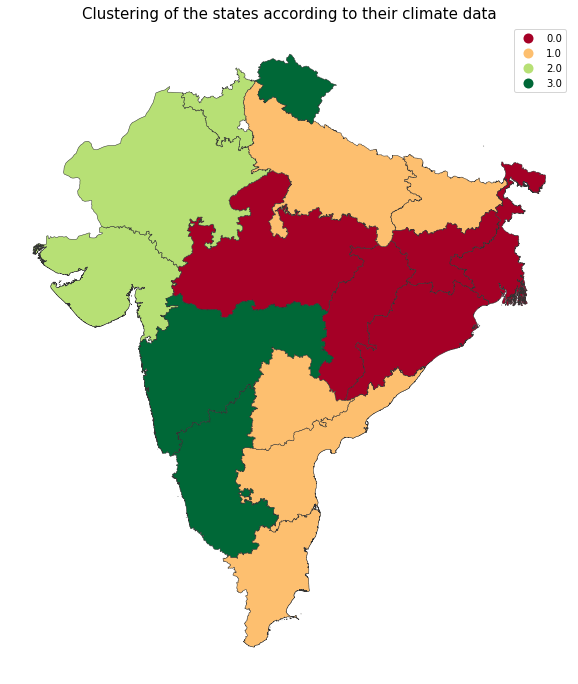

In [74]:
map_path = '../../maps/gadm36_IND_shp/gadm36_IND_1.shp'
map_gdf = gpd.read_file(map_path)
merged = map_gdf.set_index('NAME_1').join(plot_data.set_index('state'))

fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Clustering of the states according to their climate data',
            fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='cluster', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2', categorical=True, legend=True)